In [1]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5']) 
df['target'] = y 
print(df.shape) 
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.113823,1.155080,0.353879,-2.370487,-0.187599,0
1,2.782546,0.584865,-1.875050,0.023822,0.203889,1
2,0.152573,0.595001,-1.198916,0.413946,-0.312927,1
3,2.750216,0.003908,-1.119146,0.770184,0.463563,1
4,2.424497,2.427402,-6.348058,-0.388830,1.242097,1


In [5]:
# function for row sampling 
def sample_rows(df,percent): 
    return df.sample(int(percent*df.shape[0]),replace=True)

In [9]:
def sample_features(df,percent): 
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1))) 
#     new_df = df[cols] 
#     new_df['target'] = df['target'] 
    return df[cols]

In [10]:
def combined_sampling(df,row_percent,col_percent): 
    new_df = sample_rows(df,row_percent) 
    return sample_features(new_df,col_percent)

In [13]:
df1 = sample_rows(df,0.1)

In [14]:
df2 = sample_rows(df,0.1)

In [15]:
df3 = sample_rows(df,0.1)

In [16]:
from sklearn.tree import DecisionTreeClassifier 
clf1 = DecisionTreeClassifier() 
clf2 = DecisionTreeClassifier() 
clf3 = DecisionTreeClassifier()

In [22]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1]) 
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1]) 
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[3] <= 0.152\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

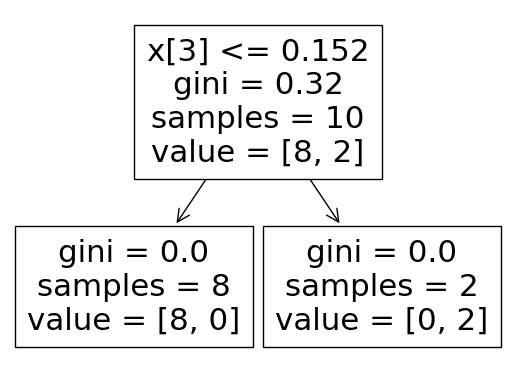

In [23]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[1] <= 0.426\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.5, 'x[0] <= -0.94\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

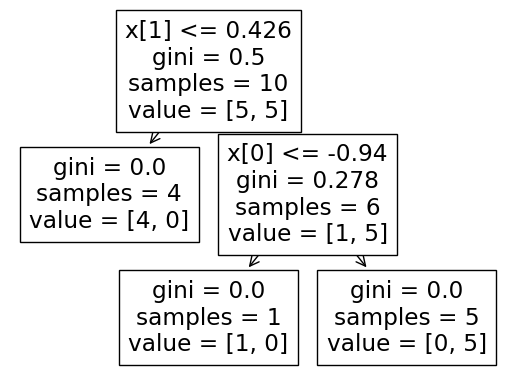

In [24]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'x[0] <= -1.186\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.5, 'x[3] <= -0.928\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

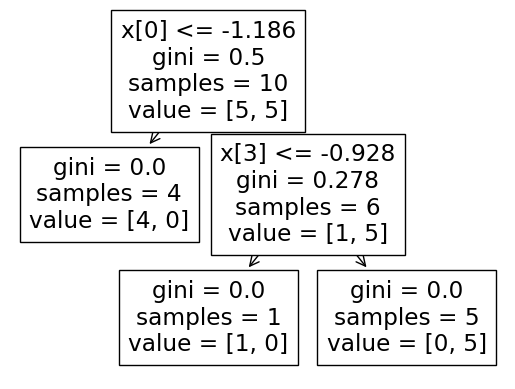

In [25]:
plot_tree(clf3)